# CDC NHANES 2013-2014 EDA

## Overview

The purpose of this notebook is to visually explore and become familiar with the patterns of the 2013-2014 NHANES datasets

In [65]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler
import os

### Demographic EDA

In [90]:
# importing clean demographic data
demographic_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/demographic_df_clean_filtered.csv')

In [92]:
demographic_df.head()

,SEQN,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,Marital_Status_Never married,Marital_Status_Separated,Marital_Status_Widowed,Ethnicity_Non-Hispanic Asian,Ethnicity_Non-Hispanic White,Ethnicity_Other Hispanic,Ethnicity_Other Race - Including Multi-Racial
0,73557,1,69,0.84,0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,73558,1,54,1.78,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,73559,1,72,4.51,0,0,0,0,0,1,1,0,0,0,0,1,0,0
3,73561,0,73,5.00,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,73562,1,56,4.79,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [94]:
demographic_df = demographic_df.set_index('SEQN')

In [96]:
demographic_df

,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,Marital_Status_Never married,Marital_Status_Separated,Marital_Status_Widowed,Ethnicity_Non-Hispanic Asian,Ethnicity_Non-Hispanic White,Ethnicity_Other Hispanic,Ethnicity_Other Race - Including Multi-Racial
SEQN,,,,,,,,,,,,,,,,,
73557,1,69,0.84,0,0,1,0,0,0,0,0,1,0,1,0,0,0
73558,1,54,1.78,0,0,1,0,0,0,1,0,0,0,0,1,0,0
73559,1,72,4.51,0,0,0,0,0,1,1,0,0,0,0,1,0,0
73561,0,73,5.00,1,0,0,0,0,0,1,0,0,0,0,1,0,0
73562,1,56,4.79,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83723,1,61,3.53,0,0,0,0,0,0,1,0,0,0,0,0,0,0
83724,1,80,3.09,0,0,1,0,0,0,1,0,0,0,0,1,0,0
83726,1,40,3.81,0,0,0,1,0,0,0,0,1,0,0,0,0,0


#### Scaling Data

In [99]:
#Scaling Clean Demographic Data
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(demographic_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_demographic_df_data = my_standard_scaler.transform(demographic_df)

scaled_demographic_df = pd.DataFrame(columns=demographic_df.columns, data=scaled_demographic_df_data, index = demographic_df.index)
scaled_demographic_df.head()

,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,Marital_Status_Never married,Marital_Status_Separated,Marital_Status_Widowed,Ethnicity_Non-Hispanic Asian,Ethnicity_Non-Hispanic White,Ethnicity_Other Hispanic,Ethnicity_Other Race - Including Multi-Racial
SEQN,,,,,,,,,,,,,,,,,
73557,1.046897,1.132027,-1.001922,-0.578044,-0.026866,1.855778,-0.292101,-0.013429,-0.666819,-1.036736,-0.484112,5.539985,-0.284396,1.968111,-0.867666,-0.311311,-0.409664
73558,1.046897,0.274932,-0.430270,-0.578044,-0.026866,1.855778,-0.292101,-0.013429,-0.666819,0.964565,-0.484112,-0.180506,-0.284396,-0.508101,1.152517,-0.311311,-0.409664
73559,1.046897,1.303446,1.229954,-0.578044,-0.026866,-0.538858,-0.292101,-0.013429,1.499658,0.964565,-0.484112,-0.180506,-0.284396,-0.508101,1.152517,-0.311311,-0.409664
73561,-0.955204,1.360586,1.527943,1.729971,-0.026866,-0.538858,-0.292101,-0.013429,-0.666819,0.964565,-0.484112,-0.180506,-0.284396,-0.508101,1.152517,-0.311311,-0.409664
73562,1.046897,0.389211,1.400234,-0.578044,-0.026866,-0.538858,-0.292101,-0.013429,1.499658,-1.036736,-0.484112,-0.180506,-0.284396,-0.508101,-0.867666,-0.311311,-0.409664


In [20]:
#scaled_demographic_df.to_csv('scaled_demographic_df.csv') #if you want to save a copy

#### Clustering Demographic Data

In [101]:
Xdemographic= scaled_demographic_df
scaler = StandardScaler()
Xscaled_demographic = scaler.fit(Xdemographic).transform(Xdemographic)

In [103]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_demographic_df)
cluster_labels = kmeans.predict(Xscaled_demographic)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


In [105]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_demographic)
in2d = pca.transform(Xscaled_demographic)

Text(0.5, 1.0, 'Clustering Demographic Features')

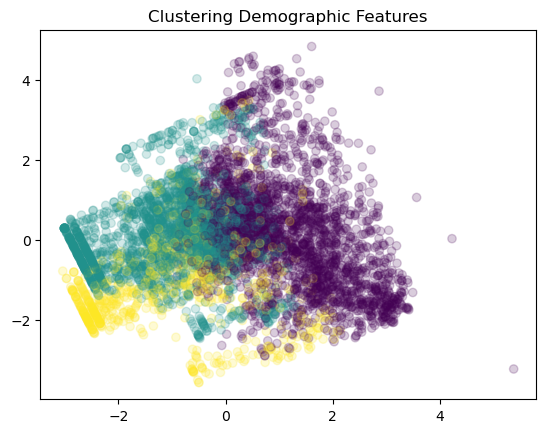

In [107]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Demographic Features')

In [109]:
pd.DataFrame(Xscaled_demographic,columns=Xdemographic.columns).groupby(cluster_labels).mean().T

,0,1,2
sex,-0.034670,0.037397,0.003088
age,-0.127172,0.211370,-0.198480
fam_income_poverty_ratio,-0.497146,0.439425,0.318117
Education_College graduate or above,-0.412724,0.286308,0.486078
Education_Don't Know,0.032757,-0.026866,-0.026866
Education_High school graduate/GED or equivalent,0.236356,-0.210141,-0.147774
Education_Less than 9th grade,0.243156,-0.252486,-0.049375
Education_Refused,0.016374,-0.013429,-0.013429
Education_Some college or AA degree,-0.111979,0.166664,-0.119756
Marital_Status_Married,-0.464936,0.422231,0.265618


In [33]:
# saving cluster labels in dataframe, can be used to sort as well
demographicdf_clusterlabels = pd.DataFrame(Xscaled_demographic,columns=Xdemographic.columns).groupby(cluster_labels).mean()

In [35]:
demographicdf_clusterlabels.T

,0,1,2
sex,-0.042220,0.035435,0.026039
age,-0.914699,1.339197,0.177015
race_HispOrigin,-0.115454,-0.002560,0.138575
race_HispOrigin_Asian,-0.085123,-0.059804,0.141400
native_country,-0.092663,0.011134,0.102286
US_Citizen,-0.122326,-0.080483,0.199502
edu_level,0.998396,-0.882589,-0.585505
marital_stat,1.067064,-0.867885,-0.676854
SPinterview_lang,0.096007,-0.056227,-0.075705
SP_interpreter,0.011253,0.026204,-0.031087


#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(Xdemographic,cluster_labels)
lr.score(Xdemographic,cluster_labels)

0.9962294914908795

In [31]:
lr.coef_

array([[-0.09110958,  0.44398155, -1.64340134, -4.17666027, -3.29017125,
         0.03983494,  0.21562488,  1.79618601,  1.84905693,  1.6867137 ,
         0.2604274 ,  1.58184242,  1.71890125,  1.57613003,  1.10152083,
        -1.13381491, -0.51965831, -1.49864973, -1.14982891, -0.09349259,
        -0.02135878,  0.15538897, -1.12763537, -0.3466369 ,  0.25293219,
         0.34822311, -0.55495892],
       [-0.09816444, -0.61279232, -2.09450452,  4.10909373,  3.27058631,
        -0.25362384, -0.09342537,  1.9938972 ,  2.09285209, -0.91631904,
        -0.54978111,  1.50847252,  1.71884994,  0.92200087,  2.00124039,
        -0.74553369,  1.17915789, -1.06213187,  0.7250726 ,  0.64944912,
        -2.34457811, -2.52510853,  1.10320252,  0.33594141, -0.5617069 ,
         0.01963739, -0.71528316],
       [ 0.18927402,  0.16881077,  3.73790585,  0.06756654,  0.01958494,
         0.2137889 , -0.12219951, -3.79008321, -3.94190902, -0.77039466,
         0.28935371, -3.09031494, -3.4377512 , -2.4981

In [107]:
# Saving clusters 
Xdemographic["cluster_lab"]=cluster_labels
#Xquest.to_csv("Xdemographic_save.csv")

### Questionnaire EDA

In [86]:
quest_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/quest_df_clean_filtered.csv')

In [88]:
quest_df.head()

,SEQN,BP_Presence_Yes,high_col_Don't Know,high_col_No,high_col_Yes,Smoked_100_cigs_Don't Know,Smoked_100_cigs_No,Smoked_100_cigs_Yes,drink_greater_11_Don't Know,drink_greater_11_No,...,angina_Yes,heart_attack_Don't Know,heart_attack_No,heart_attack_Yes,stroke_Don't Know,stroke_No,stroke_Yes,close_relative_heart_attack_Don't Know,close_relative_heart_attack_No,close_relative_heart_attack_Yes
0,73557,1,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
1,73558,1,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
2,73559,1,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
3,73561,1,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
4,73562,1,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False


#### Scaling Data

In [38]:
##Scaling Clean Questionnaire Data

# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(quest_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_quest_df_data = my_standard_scaler.transform(quest_df)

scaled_quest_df = pd.DataFrame(columns=quest_df.columns, data=scaled_quest_df_data)
scaled_quest_df.head()

,SEQN,high_bp,high_col,have_diabetes,diabetes_risk,taking_insulin,smoked_greater_100cigs,drink_greater_12,vig_work_activity,mod_work_activity,...,chd,angina,angina_age_first_present,stroke,closerel_heartattack,losing_wt,increasing_exc,reducing_salt_dt,reducing_fat_dt,insured
0,-1.731380,-0.935489,-0.946602,-0.863300,1.318217,-0.908032,-0.964867,-0.976036,-0.588819,-0.541175,...,-0.860125,-0.863404,-0.857905,-1.146604,-0.861879,-0.855687,-0.587025,-0.887477,-0.601682,-0.370137
1,-1.731039,-0.935489,-0.946602,-0.863300,1.318217,-0.908032,-0.964867,-0.976036,-0.588819,-0.839386,...,-0.860125,-0.863404,-0.857905,-0.859785,-0.861879,-0.583653,-0.587025,-0.611471,-0.601682,1.922888
2,-1.730699,-0.935489,-0.946602,-0.863300,1.318217,-0.908032,-0.964867,-0.976036,-0.588819,-0.839386,...,-0.860125,-0.863404,-0.857905,-0.859785,-1.144289,-0.583653,-0.587025,-0.611471,-0.601682,-0.370137
3,-1.730359,1.320097,1.311368,-0.160499,1.318217,-0.187175,1.226856,1.104803,1.550758,1.546305,...,1.145198,1.147994,1.148302,1.147949,1.114992,1.320580,1.321320,1.320570,1.320113,-0.370137
4,-1.730019,-0.935489,-0.664356,-0.160499,-0.714232,-0.187175,-0.690902,-0.976036,-0.588819,-0.839386,...,-0.860125,-0.863404,-0.857905,-0.859785,-1.144289,-0.855687,-0.587025,-0.611471,-0.601682,-0.370137


In [40]:
Xquest = scaled_quest_df
scaler = StandardScaler()
Xscaled_quest = scaler.fit(Xquest).transform(Xquest)

In [42]:
#Clustering with Scaled, clean questionnaire data

kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_quest_df)
cluster_labels = kmeans.predict(Xscaled_quest)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


In [44]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_quest)
in2d = pca.transform(Xscaled_quest)

Text(0.5, 1.0, 'Clustering Questionnaire Features')

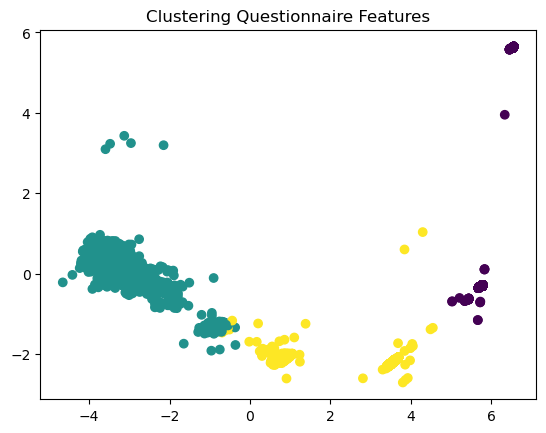

In [46]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels)
plt.title('Clustering Questionnaire Features')

In [48]:
QuestDfclusterlabels = pd.DataFrame(Xscaled_quest,columns=Xquest.columns).groupby(cluster_labels).mean()

In [50]:
QuestDfclusterlabels.T

,0,1,2
SEQN,-0.019868,0.010141,-0.002775
high_bp,1.320097,-0.752799,0.626606
high_col,1.311368,-0.747062,0.618216
have_diabetes,0.513827,-0.222472,-0.151155
diabetes_risk,1.297630,-0.500002,-0.728019
taking_insulin,0.504476,-0.211012,-0.189913
smoked_greater_100cigs,1.226856,-0.805794,1.176902
drink_greater_12,1.104803,-0.730531,1.087265
vig_work_activity,1.550758,-0.643502,-0.612621
mod_work_activity,1.546305,-0.638674,-0.627551


#### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
lr.fit(Xquest,cluster_labels)
lr.score(Xquest,cluster_labels)

0.9991847549169469

In [57]:
lr.coef_

array([[ 2.01342454e-02,  3.09752525e-01,  3.07625083e-01,
         1.27996949e-01,  6.22029326e-01,  1.35462823e-01,
         2.15223136e-01,  1.42754641e-01,  1.02811242e+00,
         1.03010627e+00,  8.01104238e-01,  7.60973026e-01,
         1.44568746e-01,  1.47731770e-01,  5.18185466e-02,
         5.15522050e-02,  5.26829565e-02,  6.33268593e-02,
         6.49463492e-02,  4.75370069e-02,  3.27385924e-01,
         3.30898829e-01,  3.26302995e-01,  3.24927893e-01,
        -1.40983503e-01],
       [ 4.96707238e-02, -7.87901797e-01, -7.30724985e-01,
        -3.60618607e-01,  4.06398009e-01, -4.04138189e-04,
        -4.80806275e-01, -9.12962879e-01,  2.93403660e-02,
        -3.62274018e-01, -2.73018064e-01, -2.34026141e-01,
        -1.66122148e+00, -4.89064155e-01, -5.85687461e-01,
        -5.85038776e-01, -6.29140841e-01, -7.30366004e-01,
        -7.46226625e-01, -5.21565175e-01, -4.84268656e-01,
        -6.31163206e-01, -4.59833794e-01, -5.20794958e-01,
         4.75240601e-01],
    

In [ ]:
# saving cluster_labels from Questionnaire df
Xquest["cluster_lab"]=cluster_labels
Xquest.to_csv("Xquest_save.csv")

### Labs EDA

In [59]:
labs_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/labs_df_clean_filtered.csv')

In [61]:
labs_df.head()

,SEQN,total_calcium_lab,chol_lab,creatinine,sodium_lab,total_protein_lab,trigly_refridg,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab
0,73557,9.5,168.0,1.21,136.0,6.5,140.0,4.7,5.09,15.2,29.9,33.4,204.0,13.9,167.0
1,73558,9.2,167.0,0.79,128.0,7.8,257.0,12.6,3.84,11.9,31.0,32.5,314.0,9.1,170.0
2,73559,8.9,127.0,1.22,142.0,5.9,51.0,7.2,5.53,17.2,31.1,34.3,237.0,8.9,126.0
3,73560,9.5,181.0,0.82,140.0,7.1,111.0,7.8,4.61,12.9,28.0,34.0,240.0,5.4,168.0
4,73561,10.0,207.0,0.73,142.0,7.1,88.0,6.6,4.72,14.5,30.6,33.0,300.0,4.9,201.0


#### Scaling Data

In [64]:
# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(labs_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_labsdf_data = my_standard_scaler.transform(labs_df)

scaled_labsdf = pd.DataFrame(columns=labs_df.columns, data=scaled_labsdf_data)
scaled_labsdf.head()

,SEQN,total_calcium_lab,chol_lab,creatinine,sodium_lab,total_protein_lab,trigly_refridg,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab
0,-1.731380,0.030153,-0.446780,0.876385,-2.124708,-1.583232,0.068396,-1.229208,0.999966,1.100103,0.179124,-0.423043,-0.750089,9.989592,-0.318788
1,-1.731039,-0.970607,-0.475905,-0.175825,-6.534206,1.817142,1.123052,2.444426,-1.887200,-1.276418,0.639958,-1.354831,1.033341,4.237289,-0.235790
2,-1.730699,-1.971368,-1.640877,0.901438,1.182416,-3.152635,-0.733864,-0.066665,2.016249,2.540419,0.681852,0.508745,-0.215060,3.997610,-1.453100
3,-1.730359,0.030153,-0.068164,-0.100668,0.080041,-0.013829,-0.193015,0.212345,-0.108705,-0.556260,-0.616862,0.198149,-0.166421,-0.196777,-0.291122
4,-1.730019,1.698087,0.689068,-0.326141,1.182416,-0.013829,-0.400341,-0.345675,0.145365,0.595992,0.472382,-0.837171,0.806359,-0.795976,0.621861


In [66]:
Xlabs = scaled_labsdf
scaler = StandardScaler()
Xscaled_labs = scaler.fit(Xlabs).transform(Xlabs)

#### Clustering

In [69]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_labsdf_data)
cluster_labels = kmeans.predict(Xscaled_labs)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [71]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_labs)
in2d = pca.transform(Xscaled_labs)

Text(0.5, 1.0, 'Clustering Lab Features')

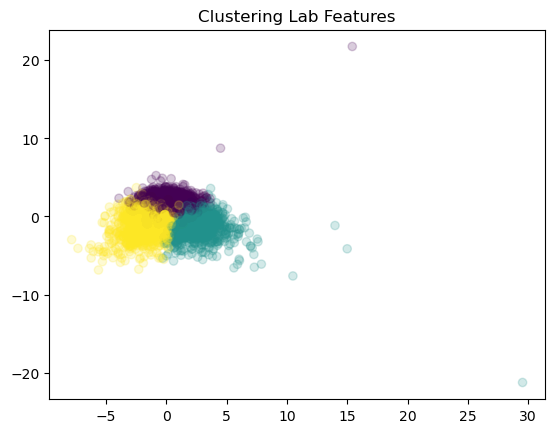

In [73]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Lab Features')

In [75]:
# saving cluster labels in dataframe
labsdf_clusterlabels = pd.DataFrame(Xscaled_quest,columns=Xquest.columns).groupby(cluster_labels).mean()

In [77]:
labsdf_clusterlabels.T

,0,1,2
SEQN,0.023183,0.019565,-0.015475
high_bp,-0.407037,-0.723409,0.392984
high_col,-0.393523,-0.746523,0.394981
have_diabetes,-0.196334,-0.227157,0.150682
diabetes_risk,-0.484887,-0.478482,0.345794
taking_insulin,-0.197948,-0.214444,0.147266
smoked_greater_100cigs,-0.360819,-0.761797,0.386836
drink_greater_12,-0.365733,-0.695539,0.367642
vig_work_activity,-0.538168,-0.643616,0.419721
mod_work_activity,-0.535669,-0.633058,0.415356


#### Logistic Regression

In [80]:
lr = LogisticRegression()
lr.fit(Xlabs,cluster_labels)
lr.score(Xlabs,cluster_labels)

0.9981656985631305

In [82]:
lr.coef_

array([[ 0.10296868, -0.02599667, -4.97333353,  0.886216  ,  1.7638043 ,
        -0.74941611, -1.3653306 , -0.91223231,  2.38274806,  3.53529632,
         2.33122501,  2.12431954, -2.69333843, -1.28450001, -4.59091434],
       [-0.03173246,  1.18480692,  7.20742287,  0.16530246, -1.11874481,
         1.32511135,  3.18578726,  0.39457638,  0.01691192,  1.45261979,
         0.85462093,  0.01581323,  0.15043273,  2.12486887,  6.90579565],
       [-0.07123622, -1.15881025, -2.23408934, -1.05151846, -0.64505949,
        -0.57569524, -1.82045666,  0.51765594, -2.39965998, -4.98791611,
        -3.18584595, -2.14013277,  2.54290571, -0.84036886, -2.31488131]])

In [103]:
# saving cluster_labels from labs df
Xlabs["cluster_lab"]=cluster_labels
Xlabs.to_csv("Xlabs_clusterlabels.csv")

### Diet EDA

In [84]:
diet_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/diet_df_clean_filtered.csv')

In [86]:
diet_df.head()

,SEQN,energy_kcal,protein_gm,carb_gm,tot_sugar_gm,tot_fat_gm,tot_sat_fattyacids_gm,tot_monounsat_fattyacids_gm,tot_polyunsat_fattyacids_gm,chol_mg_diet,...,potassium_mg_diet,calcium_mg_diet,iron_mg_diet,vit_b12_mcg,vit_c_mg,vit_d_mcg,vit_k_mcg,alcohol_gm,caffeine_mg,on_special_diet
0,73557,1574.0,43.63,239.59,176.47,52.81,17.819,18.493,8.829,209.0,...,2228.0,949.0,8.41,2.79,241.4,3.3,29.2,0.0,203.0,2.0
1,73558,5062.0,338.13,423.78,44.99,124.29,53.408,35.481,20.505,2584.0,...,4930.0,3193.0,26.88,21.45,2.3,15.2,23.4,119.0,240.0,2.0
2,73559,1743.0,64.61,224.39,102.90,65.97,25.263,20.902,12.953,88.0,...,1694.0,877.0,17.57,3.78,195.1,4.0,40.4,0.0,45.0,1.0
3,73560,1490.0,77.75,162.92,80.58,58.27,23.511,16.986,9.617,187.0,...,2088.0,1521.0,14.19,8.76,93.0,9.9,31.5,0.0,0.0,2.0
4,73561,1421.0,55.24,178.20,87.78,55.36,4.479,26.216,1.263,41.0,...,1445.0,1410.0,17.72,8.30,236.5,23.5,126.0,0.0,24.0,1.0


#### Scaling Data

In [89]:
# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(diet_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_dietdf_data = my_standard_scaler.transform(diet_df)

scaled_dietdf = pd.DataFrame(columns=diet_df.columns, data=scaled_dietdf_data)
scaled_dietdf.head()

,SEQN,energy_kcal,protein_gm,carb_gm,tot_sugar_gm,tot_fat_gm,tot_sat_fattyacids_gm,tot_monounsat_fattyacids_gm,tot_polyunsat_fattyacids_gm,chol_mg_diet,...,potassium_mg_diet,calcium_mg_diet,iron_mg_diet,vit_b12_mcg,vit_c_mg,vit_d_mcg,vit_k_mcg,alcohol_gm,caffeine_mg,on_special_diet
0,-1.731380,-0.400421,-0.712954,-0.005251,1.008695,-0.496824,-0.436297,-0.437157,-0.696095,-0.202287,...,-0.093440,0.055407,-0.676257,-0.388079,2.082203,-0.295421,-0.455744,-0.250901,0.799465,-0.295019
1,-1.731039,3.392209,6.333324,1.585952,-0.908680,1.183853,1.959176,0.642403,0.297519,10.641174,...,2.289215,4.208297,1.635235,3.829011,-0.924780,2.000876,-0.497882,5.385905,1.048900,-0.295019
2,-1.730699,-0.216662,-0.210981,-0.136562,-0.064178,-0.187399,0.064754,-0.284069,-0.345147,-0.754733,...,-0.564327,-0.077841,0.470103,-0.164342,1.499923,-0.160345,-0.374375,-0.250901,-0.265688,-0.740476
3,-1.730359,-0.491758,0.103410,-0.667597,-0.389671,-0.368445,-0.053172,-0.532924,-0.629037,-0.302732,...,-0.216893,1.113987,0.047101,0.961119,0.215886,0.978155,-0.439035,-0.250901,-0.569055,-0.295019
4,-1.730019,-0.566784,-0.435170,-0.535594,-0.284673,-0.436867,-1.334204,0.053627,-1.339952,-0.969319,...,-0.783898,0.908563,0.488875,0.857161,2.020580,3.602495,0.247517,-0.250901,-0.407259,-0.740476


In [91]:
Xdiet = scaled_dietdf
scaler = StandardScaler()
Xscaled_diet = scaler.fit(Xdiet).transform(Xdiet)

#### Clustering

In [94]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_dietdf_data)
cluster_labels = kmeans.predict(Xscaled_diet)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [96]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_diet)
in2d = pca.transform(Xscaled_diet)

Text(0.5, 1.0, 'Clustering Diet Features')

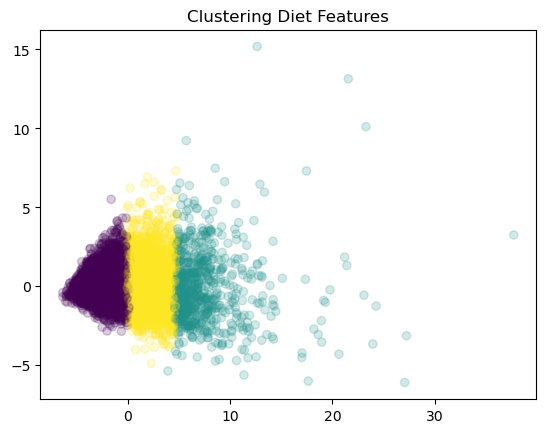

In [98]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Diet Features')

In [100]:
# saving diet cluster labels in dataframe
dietdf_clusterlabels = pd.DataFrame(Xscaled_diet,columns=Xdiet.columns).groupby(cluster_labels).mean()

In [102]:
dietdf_clusterlabels.T

,0,1,2
SEQN,-0.005281,0.045115,-0.000010
energy_kcal,-0.550541,2.397235,0.520253
protein_gm,-0.480628,2.049698,0.463932
carb_gm,-0.480902,1.998975,0.475926
tot_sugar_gm,-0.354870,1.489577,0.347925
tot_fat_gm,-0.517652,2.313396,0.475754
tot_sat_fattyacids_gm,-0.487208,2.175558,0.448177
tot_monounsat_fattyacids_gm,-0.493309,2.212821,0.451524
tot_polyunsat_fattyacids_gm,-0.438962,1.924595,0.411826
chol_mg_diet,-0.374294,1.588357,0.363070


#### Logistic Regression

In [105]:
lr_diet = LogisticRegression()
lr_diet.fit(Xdiet,cluster_labels)
lr_diet.score(Xdiet,cluster_labels)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9985733211046571

In [107]:
lr_diet.coef_

array([[-0.10412816, -3.48718161, -2.81848926, -2.96190012, -2.20685607,
        -3.08808611, -3.03907508, -3.02641376, -2.82153458, -2.32069438,
        -2.54417493, -3.18497796, -3.28571565, -2.37930805, -2.57722505,
        -1.78741208, -1.44178878, -1.33546689, -1.07332222, -0.67365104,
        -1.04337873,  0.59191937],
       [ 0.1427604 ,  2.75461041,  2.33522543,  2.48964577,  1.70758811,
         2.80023682,  2.59462721,  2.49839327,  2.28089166,  1.86458615,
         1.86676697,  2.55534398,  2.58918781,  1.98200757,  1.99010332,
         1.56378016,  1.03976616,  1.05328973,  0.73137377,  0.64381296,
         0.60974747,  0.07011416],
       [-0.03863224,  0.7325712 ,  0.48326382,  0.47225436,  0.49926796,
         0.28784929,  0.44444787,  0.52802048,  0.54064292,  0.45610823,
         0.67740796,  0.62963398,  0.69652785,  0.39730048,  0.58712173,
         0.22363192,  0.40202263,  0.28217716,  0.34194845,  0.02983809,
         0.43363127, -0.66203353]])

In [164]:
# saving cluster_labels from labs df
Xdiet["cluster_lab"]=cluster_labels
#Xdiet.to_csv("Xlabs_clusterlabels.csv")

### Examination EDA

In [109]:
exam_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/exam_df_clean_filtered.csv')

In [111]:
exam_df.head()

,SEQN,puls_reg_nonreg,bpsy_r1,bpsy_r2,bpsy_r3,bpdi_r1,bpdi_r2,bpdi_r3,weight_kg,height_cm,bmi,waist_circum_cm,arm_circum_cm,leg_len_cm
0,73557,1.0,122.0,114.0,102.0,72.0,76.0,74.0,78.3,171.3,26.7,100.0,35.3,39.2
1,73558,1.0,156.0,160.0,156.0,62.0,80.0,42.0,89.5,176.8,28.6,107.6,34.7,40.0
2,73559,1.0,140.0,140.0,146.0,90.0,76.0,80.0,88.9,175.3,28.9,109.2,33.5,40.0
3,73560,1.0,108.0,102.0,104.0,38.0,34.0,38.0,32.2,137.3,17.1,61.0,21.0,33.5
4,73561,1.0,136.0,134.0,142.0,86.0,88.0,86.0,52.0,162.4,19.7,87.8,25.2,36.3


#### Scaling Data

In [114]:
# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(exam_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_examdf_data = my_standard_scaler.transform(exam_df)

scaled_examdf = pd.DataFrame(columns=exam_df.columns, data=scaled_examdf_data)
scaled_examdf.head()

,SEQN,puls_reg_nonreg,bpsy_r1,bpsy_r2,bpsy_r3,bpdi_r1,bpdi_r2,bpdi_r3,weight_kg,height_cm,bmi,waist_circum_cm,arm_circum_cm,leg_len_cm
0,-1.731380,-0.115869,0.287286,-0.232787,-0.950483,0.482300,0.775022,0.581731,0.487104,0.669393,0.143520,0.598084,0.873417,0.175464
1,-1.731039,-0.115869,2.483279,2.673821,2.466868,-0.299621,1.068164,-1.678009,0.835121,0.915637,0.392024,0.956955,0.796029,0.403038
2,-1.730699,-0.115869,1.449871,1.410078,1.834025,1.889756,0.775022,1.005432,0.816477,0.848479,0.431261,1.032506,0.641254,0.403038
3,-1.730359,-0.115869,-0.616946,-0.991033,-0.823914,-2.176229,-2.302975,-1.960477,-0.945356,-0.852842,-1.112078,-1.243487,-0.970989,-1.446002
4,-1.730019,-0.115869,1.191519,1.030955,1.580888,1.576988,1.654450,1.429134,-0.330113,0.270925,-0.772020,0.022003,-0.429275,-0.649493


In [116]:
Xexam = scaled_examdf
scaler = StandardScaler()
Xscaled_exam = scaler.fit(Xexam).transform(Xexam)

#### Clustering

In [119]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_examdf_data)
cluster_labels = kmeans.predict(Xscaled_exam)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [121]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_exam)
in2d = pca.transform(Xscaled_exam)

Text(0.5, 1.0, 'Clustering Examination Features')

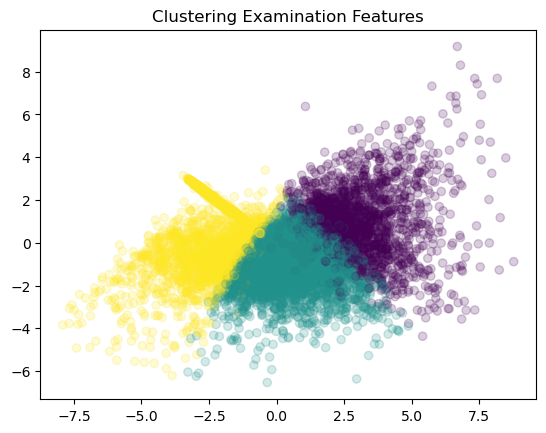

In [123]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Examination Features')

In [125]:
# saving diet cluster labels in dataframe
examdf_clusterlabels = pd.DataFrame(Xscaled_exam,columns=Xexam.columns).groupby(cluster_labels).mean()

In [127]:
examdf_clusterlabels.T

,0,1,2
SEQN,-0.030781,0.012627,0.001029
puls_reg_nonreg,0.196001,-0.013764,-0.084726
bpsy_r1,1.434265,-0.244649,-0.451151
bpsy_r2,1.490853,-0.250255,-0.473698
bpsy_r3,1.504906,-0.234394,-0.499537
bpdi_r1,0.876048,-0.031763,-0.413600
bpdi_r2,0.838908,-0.035107,-0.390563
bpdi_r3,0.762727,-0.040878,-0.344586
weight_kg,0.794666,0.524863,-1.024696
height_cm,0.479515,0.513636,-0.849333


#### Logistic Regression

In [130]:
lr_exam = LogisticRegression()
lr_exam.fit(Xexam,cluster_labels)
lr_exam.score(Xexam,cluster_labels)

0.9960256802201162

In [132]:
lr_exam.coef_

array([[-0.09599591,  0.649848  ,  4.65895004,  4.72142419,  4.56234072,
         2.5783768 ,  2.58292707,  2.36974321,  3.3686958 ,  1.55661735,
         2.39229617,  2.68944725,  2.36806914,  0.34921533],
       [ 0.03230784, -0.16557509, -1.847254  , -1.73425787, -1.65639082,
        -0.42323272, -0.49233582, -0.51757836,  1.86518804,  2.16423769,
         1.3117485 ,  1.36527129,  2.05046695,  1.3616176 ],
       [ 0.06368807, -0.48427291, -2.81169604, -2.98716633, -2.9059499 ,
        -2.15514409, -2.09059125, -1.85216485, -5.23388384, -3.72085504,
        -3.70404466, -4.05471853, -4.41853609, -1.71083293]])

In [134]:
# saving cluster_labels from labs df
Xexam["cluster_lab"]=cluster_labels
#Xexam.to_csv("Xexam_clusterlabels.csv")

### Medications EDA

In [78]:
meds_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/medic_df_clean_filtered.csv')

In [80]:
meds_df.head()

,SEQN,rx_use,drug_name,RXQSEEN,rx_days,rx_amt
0,73557,1,INSULIN,2.0,1460.0,2.0
1,73558,1,GABAPENTIN,1.0,243.0,4.0
2,73558,1,INSULIN GLARGINE,1.0,365.0,4.0
3,73558,1,OLMESARTAN,1.0,14.0,4.0
4,73558,1,SIMVASTATIN,1.0,61.0,4.0


In [84]:
# dropping RXQSEEN column -> if medication container was seen by the interviewer 

meds_df = meds_df.drop(columns='RXQSEEN')
meds_df

,SEQN,rx_use,drug_name,rx_days,rx_amt
0,73557,1,INSULIN,1460.0,2.0
1,73558,1,GABAPENTIN,243.0,4.0
2,73558,1,INSULIN GLARGINE,365.0,4.0
3,73558,1,OLMESARTAN,14.0,4.0
4,73558,1,SIMVASTATIN,61.0,4.0
...,...,...,...,...,...
19457,83727,2,CLONAZEPAM,1095.0,5.0
19458,83728,2,TAMSULOSIN,1095.0,5.0
19459,83729,2,LEVOTHYROXINE,1095.0,5.0
19460,83730,2,ALPRAZOLAM,1095.0,5.0


In [86]:
meds_df.shape

(19462, 5)

<AxesSubplot:title={'center':'Top 20 Medications'}>

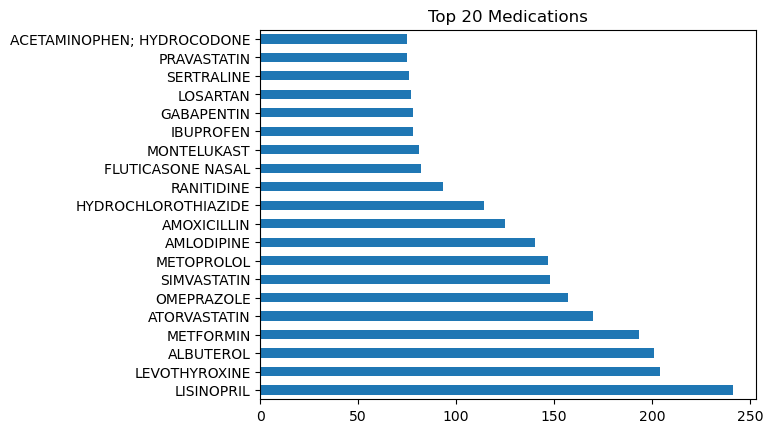

In [66]:
meds_df['drug_name'].value_counts().head(20).plot(kind='barh',title='Top 20 Medications')

Medications that can be correlated to CVD:

Rx that end in -Statin typically are used to control cholesterol levels

In [90]:
# drop rows that have rx_use = 2 
meds_df = meds_df[meds_df['rx_use'] != 2]
meds_df

,SEQN,rx_use,drug_name,rx_days,rx_amt
0,73557,1,INSULIN,1460.0,2.0
1,73558,1,GABAPENTIN,243.0,4.0
2,73558,1,INSULIN GLARGINE,365.0,4.0
3,73558,1,OLMESARTAN,14.0,4.0
4,73558,1,SIMVASTATIN,61.0,4.0
...,...,...,...,...,...
19450,83724,1,LOSARTAN,10950.0,5.0
19451,83724,1,MESALAMINE,182.0,5.0
19452,83724,1,ROPINIROLE,5475.0,5.0
19453,83724,1,TERAZOSIN,3650.0,5.0


In [92]:
# drop rx_use column
meds_df = meds_df.drop(columns= 'rx_use')
meds_df

,SEQN,drug_name,rx_days,rx_amt
0,73557,INSULIN,1460.0,2.0
1,73558,GABAPENTIN,243.0,4.0
2,73558,INSULIN GLARGINE,365.0,4.0
3,73558,OLMESARTAN,14.0,4.0
4,73558,SIMVASTATIN,61.0,4.0
...,...,...,...,...
19450,83724,LOSARTAN,10950.0,5.0
19451,83724,MESALAMINE,182.0,5.0
19452,83724,ROPINIROLE,5475.0,5.0
19453,83724,TERAZOSIN,3650.0,5.0


In [98]:
# Finishing cleaning medications dataset 
# Group by SEQN and aggregate medication info as a list for each participant
meds_df = meds_df.groupby('SEQN').agg(lambda x: ', '.join(x.astype(str)))

# Now you can concatenate this with the other dataframes
#meds_df.set_index('SEQN', inplace=True)
#concatenated_df = pd.concat([df1, df2, df3, df4, df5, medic_df_grouped], axis=1)

In [100]:
meds_df

,drug_name,rx_days,rx_amt
SEQN,,,
73557,INSULIN,1460.0,2.0
73558,"GABAPENTIN, INSULIN GLARGINE, OLMESARTAN, SIMV...","243.0, 365.0, 14.0, 61.0","4.0, 4.0, 4.0, 4.0"
73559,"INSULIN ASPART, INSULIN GLARGINE, PANCRELIPASE...","365.0, 4380.0, 365.0, 2920.0, 3650.0","5.0, 5.0, 5.0, 5.0, 5.0"
73561,"CARVEDILOL, LEVOTHYROXINE, VALSARTAN","6205.0, 6205.0, 4380.0","4.0, 4.0, 4.0"
73562,"AMLODIPINE, ATORVASTATIN, LISINOPRIL, MINOXIDI...","365.0, 1825.0, 3650.0, 365.0, 730.0, 5475.0, 3...","7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0"
...,...,...,...
83716,"FLUORIDE TOPICAL, MINOCYCLINE, TRETINOIN TOPICAL","730.0, 365.0, 365.0","3.0, 3.0, 3.0"
83717,"BENAZEPRIL, OMEPRAZOLE","91.0, 91.0","2.0, 2.0"
83718,"ACETAMINOPHEN; OXYCODONE, ALBUTEROL, BUDESONID...","1825.0, 1095.0, 1095.0, 1095.0, 1095.0","5.0, 5.0, 5.0, 5.0, 5.0"


In [ ]:
# saving this dataframe 
#pd.to_csv("Meds.csv")